# Hello, KAN!

### Initialize KAN

In [1]:
from kan import *
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)

### Create dataset

In [2]:
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

### Plot KAN at initialization

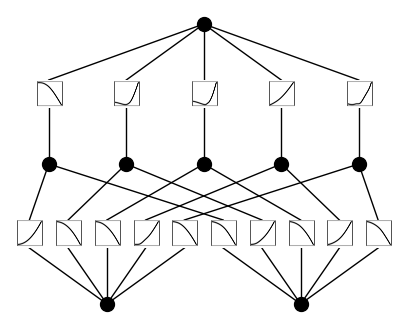

In [3]:
# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)

### Train KAN with sparsity regularization

In [4]:
# train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);

train loss: 6.96e-02 | test loss: 6.53e-02 | reg: 2.39e+01 : 100%|█| 20/20 [00:1


### Plot trained KAN

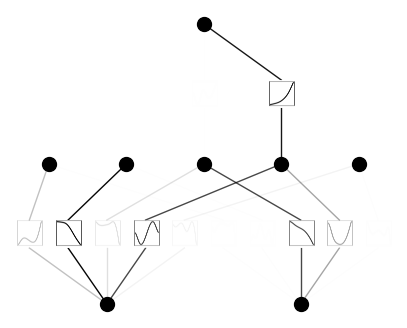

In [5]:
model.plot()

### Prune KAN and replot (keep the original shape)

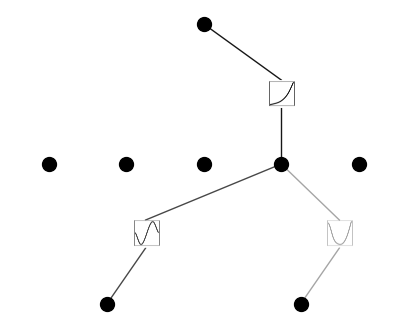

In [6]:
model.prune()
model.plot(mask=True)

### Prune KAN and replot (get a smaller shape)

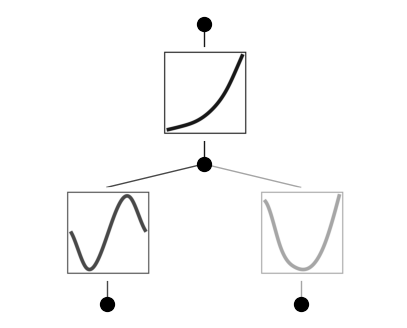

In [7]:
model = model.prune()
model(dataset['train_input'])
model.plot()

### Continue training and replot

In [8]:
model.train(dataset, opt="LBFGS", steps=50);

train loss: 4.69e-03 | test loss: 4.75e-03 | reg: 2.76e+00 : 100%|█| 50/50 [00:0


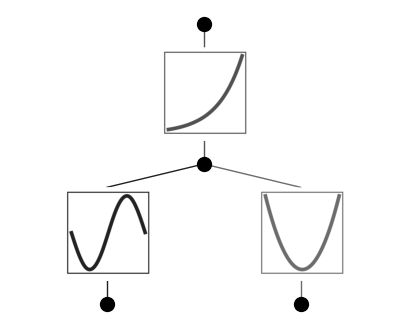

In [9]:
model.plot()

### Automatically or manually set activation functions to be symbolic

In [10]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.999987303715613
fixing (0,1,0) with x^2, r2=0.9999997184335331
fixing (1,0,0) with exp, r2=0.9999992042106736


### Continue training to almost machine precision

In [11]:
model.train(dataset, opt="LBFGS", steps=50);

train loss: 8.88e-12 | test loss: 8.29e-12 | reg: 2.76e+00 : 100%|█| 50/50 [00:0


### Obtain the symbolic formula

In [12]:
model.symbolic_formula()[0]

1.0*exp(1.0*x_2**2 + 1.0*sin(3.14*x_1))